In [1]:
import os
import tensorflow as tf
path = "F:/Mini Project/Project/Dataset"
def get_from_dir(dir):
    global path
    dir = os.path.join(path,dir)
    return tf.keras.preprocessing.image_dataset_from_directory(
           dir,
           labels='inferred',
           color_mode="rgb",
           seed=42,
           batch_size=32,
           image_size=(128, 128))
test = get_from_dir("Test")


Found 10905 files belonging to 2 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


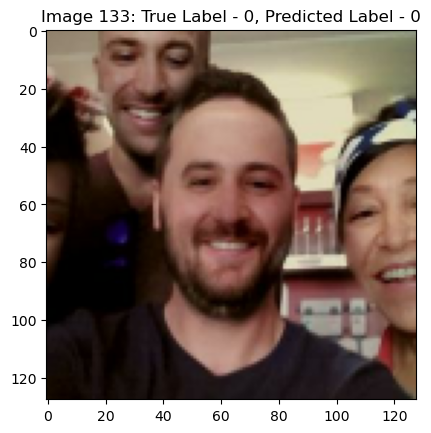

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


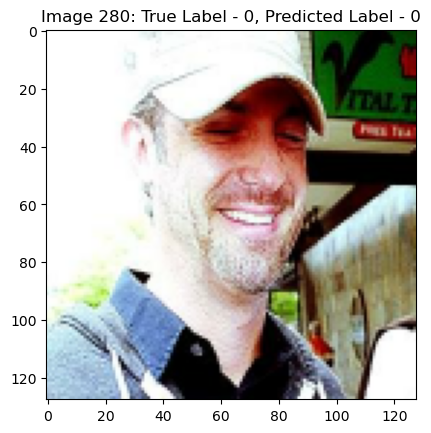

Image 1: True Label - 0, Predicted Label - 0
Image 2: True Label - 0, Predicted Label - 0


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model = tf.keras.models.load_model("deepfake-detector-model.keras")

# Get a list of indices for random images in the test set
num_images = 2
random_indices = random.sample(range(len(test)), num_images)

# Iterate through the random indices and predict
predicted_labels = []
for i in random_indices:
    # Get the image and its true label
    image, true_label = list(test)[i//32][0][i%32], list(test)[i//32][1][i%32]

    # Make prediction
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = 1 if prediction >= 0.5 else 0
    predicted_labels.append(predicted_label)

    # Display the image and its true/predicted labels
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"Image {i+1}: True Label - {int(true_label)}, Predicted Label - {predicted_label}")
    plt.show()

#Print true and predicted labels outside the loop
true_labels_random = [list(test)[i//32][1][i%32] for i in random_indices]
for i in range(2):
  print(f"Image {i+1}: True Label - {int(true_labels_random[i])}, Predicted Label - {predicted_labels[i]}")

In [3]:
loss, accuracy = model.evaluate(test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

341/341 ━━━━━━━━━━━━━━━━━━━━ 57s 165ms/step - accuracy: 0.9232 - loss: 0.2062
Test Loss: 0.20691968500614166
Test Accuracy: 0.919761598110199
